# Notebook for Finding a Good Center Value 

__About:__  
The most challenging and most influential step in the data processing is the center finding. Use this notebook to optimize the global variables used in the center finding algorithm including `CENTER_GUESS`, `RADIUS_GUESS`, and `DISK_RADIUS`. Each time you change a global variable, restart your kernel and rerun the following code blocks until you're happy with the result.

## Global Variable Usage
The package `gued.py` relies on a few global variables which should be optimized for each experiment. The global variables are stored in `gued_globals.py` and follow standard formatting of all caps (i.e., CENTER_GUESS = (470, 450)). 

In [1]:
%%writefile gued_globals.py
### Global Variables for entire code

# Values used for center finding 
CENTER_GUESS = (480, 480)
RADIUS_GUESS = 35
DISK_RADIUS = 2

# Values used for generating background
CORNER_RADIUS = 20
CHECK_NUMBER = 50

# Values used for masking images
MASK_CENTER = [475, 475]
MASK_RADIUS = 40
ADDED_MASK = [[440, 435, 30]]
SEPARATORS = ['-', '_']

# Value used for the standard deviation based threshold throughout the code
STD_FACTOR = 3

# Maximum processors to be used when running in parallel
MAX_PROCESSORS = 6


Overwriting gued_globals.py


## Import Packages

In [2]:
# Standard Packages
import numpy as np
import glob
import matplotlib.pyplot as plt
from datetime import date

#multiprocessing
from multiprocessing.dummy import Pool as ThreadPool

# new code 
import gued

## Reading in Data and Visualizing

### Defining path -- Uses * to make more accessible for reading in multiple scan files

In [3]:
dataPath = 'C:\\Users\\laure\\OneDrive - University of Nebraska-Lincoln\\Documents\\Centurion Lab\\nitrophenyl code\\20180823\\Run\\'
runPath = "\\*\\*\\*\\ANDOR1_*.tif"


bkg_path = '/work/centurion/shared/UED_data/FY18_o-nitrophenol/20180823/Background/*/*/ANDOR1_*.tif'


newPath = dataPath + runPath
print(newPath)
print(bkg_path)

files = glob.glob(newPath) 
bkg_files = glob.glob(bkg_path)
print(len(files))
print(len(bkg_files))

C:\Users\laure\OneDrive - University of Nebraska-Lincoln\Documents\Centurion Lab\nitrophenyl code\20180823\Run\\*\*\*\ANDOR1_*.tif
/work/centurion/shared/UED_data/FY18_o-nitrophenol/20180823/Background/*/*/ANDOR1_*.tif
1998
0


### Reading in All Data and Getting Total Counts -- Lauren's Version

In [4]:
help(gued.get_image_details)

Help on function get_image_details in module gued:

get_image_details(file_names, sort=True, filter_data=False, plot=False)
    Reads all images from input file_names and returns the data as a 3d array along with stage positions, order, and counts per image.
    
    ARGUMENTS:
    
    file_names (list):
        list of file names to be read in
    
    OPTIONAL ARGUMENTS:
    
    sort (boolean): 
        default is set to True. This arguments sorts the data based on when it was saved (i.e. file number)
    plot (boolean): 
        default is set to False. When True, a plot of the data, log(data), and histogram of counts is shown
    filter_data (boolean): 
        default is set to False. When True, code prompts you for a minimum and maximum value then
        returns only the information from files within this range
    
    GLOBAL VARIABLES:
    
    SEPARATORS (list):
        list of strings such as '_' or '-' which are used in the file naming scheme to separate values needed for

Takes ~ 30 seconds for 2000 images

Loading diffraction signal


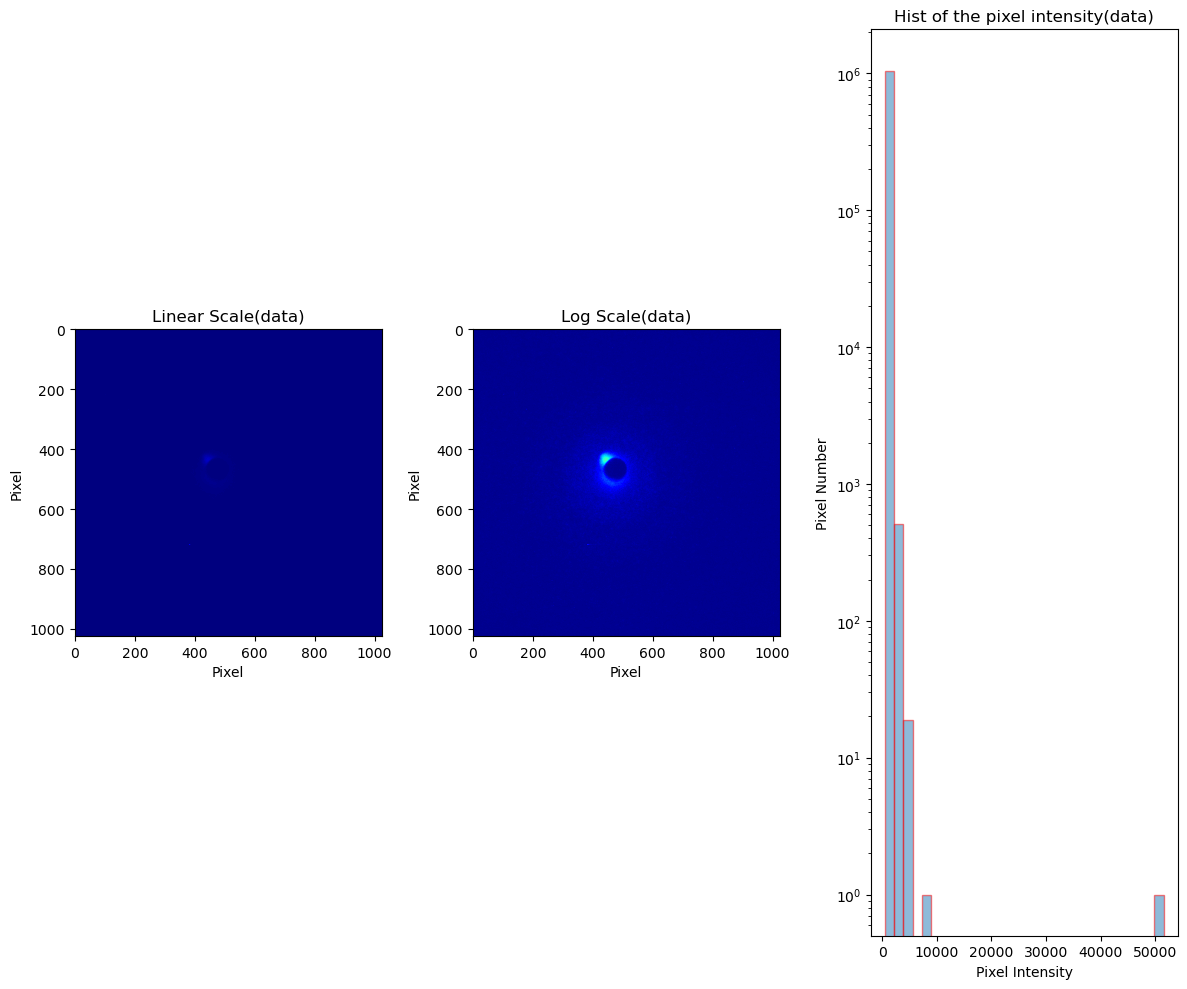

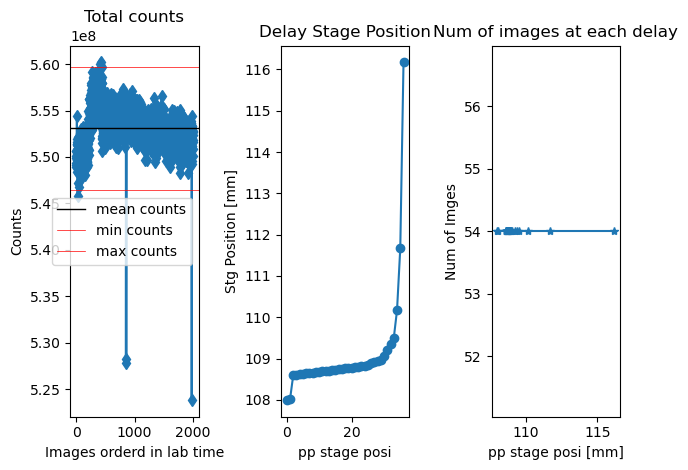

In [5]:
print('Loading diffraction signal');
data_array, stage_positions, file_numbers, counts = gued.get_image_details(files, sort=True, filter_data=False, plot=True)

counts_mean = np.mean(counts)        # Mean values of Total Counts of all images
counts_std  = np.std(counts)         # the STD of all the tc for all the iamges
uni_stage = np.unique(stage_positions)# Pump-probe stage position


## Finding Diffraction Center

In [6]:
help(gued.find_center_pool)

Help on function find_center_pool in module gued:

find_center_pool(data_array, plot=True, print_stats=True)
    Finds center of each image in the data array using concurrent.futures.ThreadPoolExecutor to quickly process
    many data files.
    
    ARGUMENTS:
    
    data_array (ndarray): 
        array of image like data with shape Nx1024x1024
    
    OPTIONAL ARGUMENTS:
    
    plot (boolean): 
        Default is set to True. When true, plots an image of the values for center_x and center_y with respect to pixel number
    print_stats (boolean): 
        Default is set to True. Prints the average value for center_x and center_y and prints the percent failure rate.
    
    GLOBAL VARIABLES:
    
    CENTER_GUESS (tuple): 
        initial guess for center position
    RADIUS_GUESS (int): 
        initial guess for the radius
    DISK_RADIUS (int): 
        value for disk radius used in mapping
    
    RETURNS:
    
    center_x (array):
        One-dimensional array of x values 

### Find Center for Average Image

In [7]:
ave_data = np.nanmean(data_array, axis=0)

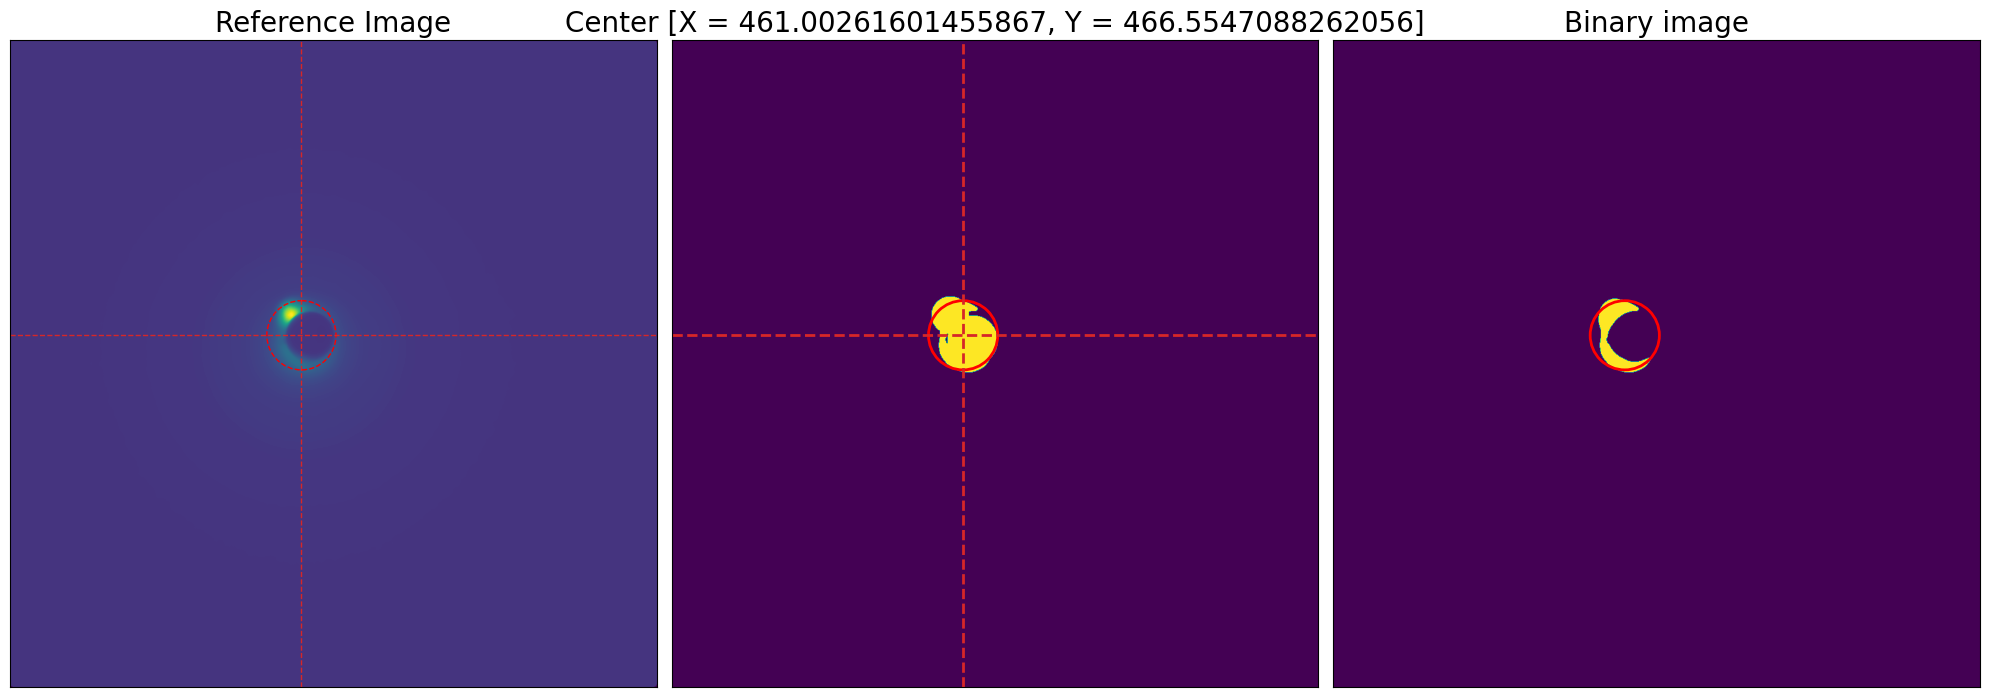

(461.00261601455867, 466.5547088262056, 54.79518061009706, 994.50927783252)


In [8]:
# only works when done before other steps...
center = gued.finding_center_alg(ave_data, plot=True)
print(center)